In [1]:
#Imports
import os
os.environ["OMP_NUM_THREADS"] = '1'
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Import data.

In [2]:
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['superhero_info - superhero_info.csv',
 'superhero_powers - superhero_powers.csv']

In [3]:
csv=('C:/Users/Mikey/Documents/GitHub/dojo-env-setup/superhero/superhero/Data/superhero_info - superhero_info.csv',
    'C:/Users/Mikey/Documents/GitHub/dojo-env-setup/superhero/superhero/Data/superhero_powers - superhero_powers.csv')

In [4]:
# Define ea data frame
df_info=pd.read_csv(os.path.join(FOLDER, csv[0]))
df_powers=pd.read_csv(os.path.join(FOLDER, csv[1]))

## Checking column info.

In [5]:
print(f' info columns :{df_info.columns}')

 info columns :Index(['Hero|Publisher', 'Gender', 'Race', 'Alignment', 'Hair color',
       'Eye color', 'Skin color', 'Measurements'],
      dtype='object')


In [6]:
print(f' power columns :{df_powers.columns}')

 power columns :Index(['hero_names', 'Powers'], dtype='object')


In [7]:
df_info['Hero|Publisher'].unique()

array(['A-Bomb|Marvel Comics', 'Abe Sapien|Dark Horse Comics',
       'Abin Sur|DC Comics', 'Abomination|Marvel Comics',
       'Absorbing Man|Marvel Comics', 'Adam Strange|DC Comics',
       'Agent Bob|Marvel Comics', 'Agent Zero|Marvel Comics',
       'Air-Walker|Marvel Comics', 'Ajax|Marvel Comics',
       'Alan Scott|DC Comics', 'Alien|Dark Horse Comics',
       'Amazo|DC Comics', 'Ammo|Marvel Comics', 'Angel|Marvel Comics',
       'Angel Dust|Marvel Comics', 'Angel Salvadore|Marvel Comics',
       'Animal Man|DC Comics', 'Annihilus|Marvel Comics',
       'Ant-Man|Marvel Comics', 'Ant-Man II|Marvel Comics',
       'Anti-Venom|Marvel Comics', 'Apocalypse|Marvel Comics',
       'Aqualad|DC Comics', 'Aquaman|DC Comics', 'Arachne|Marvel Comics',
       'Archangel|Marvel Comics', 'Arclight|Marvel Comics',
       'Ardina|Marvel Comics', 'Ares|Marvel Comics',
       'Ariel|Marvel Comics', 'Armor|Marvel Comics',
       'Atlas|Marvel Comics', 'Atlas|DC Comics', 'Atom|DC Comics',
       'Ato

In [8]:
# Removing ' ' etc.
df_info.columns=df_info.columns.str.strip()
df_powers.columns=df_powers.columns.str.strip()

In [9]:
df_info.isna().sum()

Hero|Publisher    0
Gender            0
Race              0
Alignment         0
Hair color        0
Eye color         0
Skin color        0
Measurements      0
dtype: int64

In [10]:
df_powers.isna().sum()

hero_names    0
Powers        0
dtype: int64

In [11]:
# Extract the numeric values from the "Measurements" column using regular expressions
pattern = r"(\d+\.\d+)"
df_info['Height'] = df_info['Measurements'].str.extract(pattern, expand=False).astype(float)
# Remove the "kg" and convert the "Weight" column to numeric
df_info['Weight'] = df_info['Measurements'].str.replace('kg', '').str.extract(pattern,
                                                            expand=False).astype(float)

In [12]:
# Split Hero|Publisher
df_info[['hero_names','Publisher']]=df_info['Hero|Publisher'].str.split('|',expand=True)
df_info.head(2)

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Height,Weight,hero_names,Publisher
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",203.0,203.0,A-Bomb,Marvel Comics
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",191.0,191.0,Abe Sapien,Dark Horse Comics


In [13]:
# Drop Hero|Publisher
df_info=df_info.drop(columns=['Hero|Publisher'])
df_info.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Height,Weight,hero_names,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",203.0,203.0,A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",191.0,191.0,Abe Sapien,Dark Horse Comics


In [14]:
#Split powers into columns.
df_powers['powers_split']=df_powers['Powers'].str.split(',')
#Define explode funciton
exploded=df_powers.explode('powers_split')
exploded[['hero_names','Powers','powers_split']]

,hero_names,Powers,powers_split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Agility
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Strength
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Stamina
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Speed
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Accelerated Healing
...,...,...,...
665,Zatanna,"Cryokinesis,Telepathy,Magic,Fire Control,Proba...",Weather Control
666,Zoom,"Super Speed,Intangibility,Time Travel,Time Man...",Super Speed
666,Zoom,"Super Speed,Intangibility,Time Travel,Time Man...",Intangibility
666,Zoom,"Super Speed,Intangibility,Time Travel,Time Man...",Time Travel


In [15]:
#Explode powers_split
cols_to_make=exploded['powers_split'].dropna().unique()
cols_to_make

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [16]:
#Ignore performance warning.
import warnings
warnings.filterwarnings("ignore")
#loop to create columns and provide true or false if that hero has said power.
for col in cols_to_make:
    df_powers[col]=df_powers['Powers'].str.contains(col)
df_powers.head()

#Resetting warnings.
warnings.filterwarnings("default")

In [17]:
df_powers=df_powers.drop(columns=['Powers','powers_split'])
df_powers.head()

,hero_names,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,Self-Sustenance,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,True,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
# Merging our data frames on hero_names
df_merged = pd.merge(df_info, df_powers, left_on='hero_names', right_on='hero_names', how='inner')

In [19]:
df_merged.columns

Index(['Gender', 'Race', 'Alignment', 'Hair color', 'Eye color', 'Skin color',
       'Measurements', 'Height', 'Weight', 'hero_names',
       ...
       'Weather Control', 'Omnipresent', 'Omniscient', 'Hair Manipulation',
       'Nova Force', 'Odin Force', 'Phoenix Force', 'Intuitive aptitude',
       'Melting', 'Changing Armor'],
      dtype='object', length=178)

In [20]:
# Creating and saving the csv for combinded or merged data frame.
df_merged.to_csv(os.path.join(FOLDER, 'combined.csv'), index=False)

In [21]:
combined_path=os.path.join(FOLDER,'combined.csv')
combined=pd.read_csv(combined_path)

In [22]:
combined.columns

Index(['Gender', 'Race', 'Alignment', 'Hair color', 'Eye color', 'Skin color',
       'Measurements', 'Height', 'Weight', 'hero_names',
       ...
       'Weather Control', 'Omnipresent', 'Omniscient', 'Hair Manipulation',
       'Nova Force', 'Odin Force', 'Phoenix Force', 'Intuitive aptitude',
       'Melting', 'Changing Armor'],
      dtype='object', length=178)

In [23]:
combined.drop_duplicates(inplace=True)

In [24]:
# Filters for data exploration.
grouped_data = combined.groupby(combined['Super Speed'] == 1)['Weight'].mean()
avg_weight_with_super_speed = grouped_data[True]
avg_weight_without_super_speed = grouped_data[False]
avg_height_by_publisher = df_merged.groupby('Publisher')['Height'].mean()

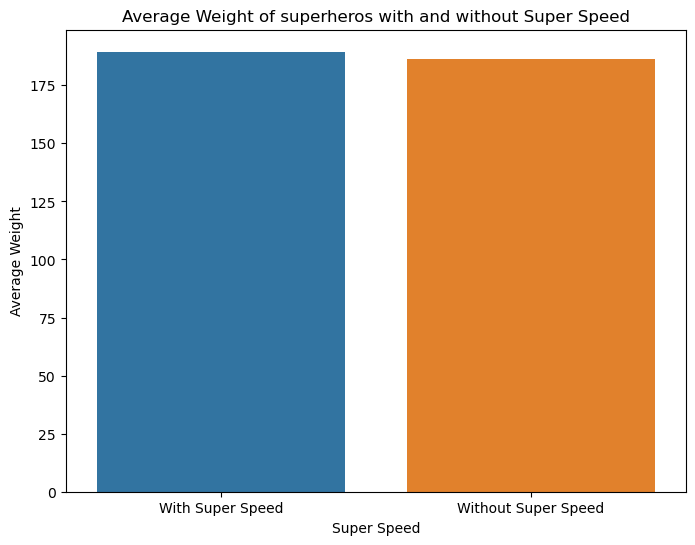

Average weight of superheros with Super Speed: 189.44444444444446
Average weight of superheros without Super Speed: 186.37622641509432


In [25]:
plt.figure(figsize=(8, 6))
sns.barplot(x=['With Super Speed', 'Without Super Speed'], y=[avg_weight_with_super_speed, avg_weight_without_super_speed])
plt.title('Average Weight of superheros with and without Super Speed')
plt.xlabel('Super Speed')
plt.ylabel('Average Weight')
plt.show()

print("Average weight of superheros with Super Speed:", avg_weight_with_super_speed)
print("Average weight of superheros without Super Speed:", avg_weight_without_super_speed)

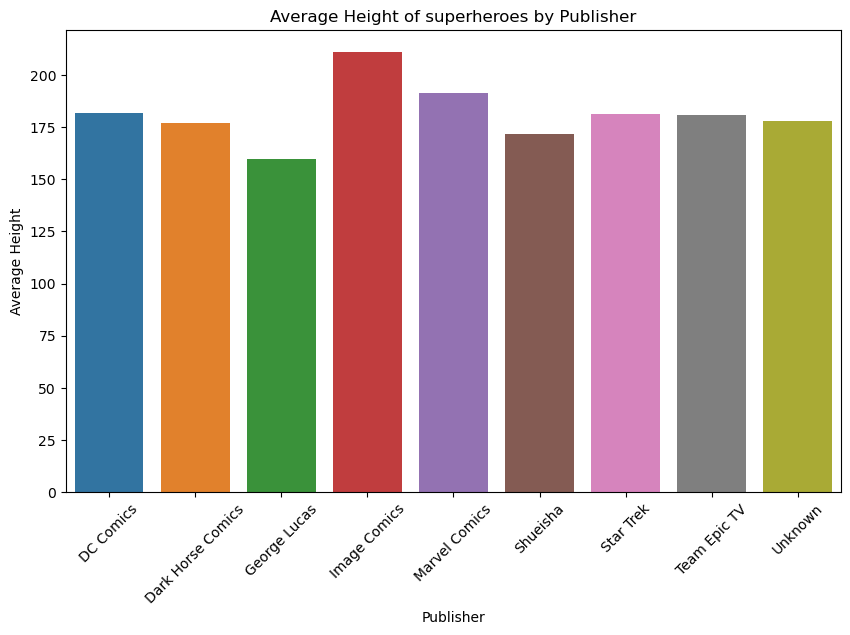

Average height of superheroes by publisher:
 Publisher
DC Comics            181.923913
Dark Horse Comics    176.909091
George Lucas         159.600000
Image Comics         211.000000
Marvel Comics        191.546128
Shueisha             171.500000
Star Trek            181.500000
Team Epic TV         180.750000
Unknown              178.000000
Name: Height, dtype: float64


In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_height_by_publisher.index, y=avg_height_by_publisher.values)
plt.title('Average Height of superheroes by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Average Height')
plt.xticks(rotation=45)
plt.show()
print("Average height of superheroes by publisher:\n", avg_height_by_publisher)